In [14]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
lats=np.random.uniform(low=-90.000,high=90.000, size=1500)
lngs=np.random.uniform(low=-180.000,high=180.000, size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [16]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [17]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [18]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

iqaluit ca
kamenskoye ru
atuona pf
rikitea pf
thompson ca
poplar bluff us
canarana br
norman wells ca
laje br
ahuimanu us
carnarvon au
airai pw
belushya guba ru
atuona pf
saskylakh ru
chokurdakh ru
clyde river ca
illoqqortoormiut gl
grindavik is
roros no
nizhneyansk ru
sahrak af
busselton au
bull savanna jm
dikson ru
manicore br
oktyabrskoye ru
ushuaia ar
loukhi ru
mocuba mz
busselton au
nikolskoye ru
albany au
vaini to
upernavik gl
chuy uy
tuatapere nz
nikolskoye ru
upernavik gl
dikson ru
coihaique cl
nadym ru
san blas mx
iqaluit ca
itarantim br
rikitea pf
new norfolk au
qaanaaq gl
punta arenas cl
nacogdoches us
clarence town bs
kavieng pg
pueblo nuevo mx
zharkent kz
albany au
new norfolk au
busselton au
sao filipe cv
khatanga ru
hofn is
bure et
kargasok ru
kruisfontein za
cape town za
avarua ck
vokhma ru
tiznit ma
mokhsogollokh ru
albany au
ahipara nz
hermanus za
luderitz na
umzimvubu za
hilo us
bababe mr
vila franca do campo pt
arraial do cabo br
cape town za
san patricio mx
tigil r

tura ru
albany au
coihaique cl
ilulissat gl
bredasdorp za
santo andre pt
sandakan my
agirish ru
cabo san lucas mx
de-kastri ru
jamestown sh
kaitangata nz
kavaratti in
hualmay pe
puerto ayora ec
punta arenas cl
rio grande br
cape town za
bredasdorp za
blonduos is
jamestown sh
bengkulu id
aanekoski fi
itatiaia br
savannah bight hn
punta arenas cl
cabedelo br
pitimbu br
kuche cn
busselton au
korla cn
khatanga ru
arraial do cabo br
vuktyl ru
ushuaia ar
burgeo ca
flinders au
tuktoyaktuk ca
amderma ru
illoqqortoormiut gl
toliary mg
bandarbeyla so
klaksvik fo
adwa et
port alfred za
ribeira grande pt
aguachica co
barentsburg sj
puerto escondido mx
pozo colorado py
surskoye ru
new norfolk au
dikson ru
hilo us
albany au
hermanus za
khonuu ru
portland au
hermanus za
tuktoyaktuk ca
ushuaia ar
ushuaia ar
severo-kurilsk ru
busselton au
egvekinot ru
hithadhoo mv
stoyba ru
hermanus za
mataura pf
cape town za
geraldton au
hearst ca
albany au
souillac mu
manggar id
paracuru br
saint-francois gp
nikolsko

In [19]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

598

In [27]:
%%markdown
# 6.2.4: Make a Request for Data to an API

# 6.2.4: Make a Request for Data to an API


In [28]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [29]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea62e5eca42fdab584941d603868fc6e


In [20]:
%%markdown
# 6.2.6 Get the City Weather Data


# 6.2.6 Get the City Weather Data


In [30]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [31]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [42]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]


# This will cause programming errors when we are building the city_url because it adds the index, not the city name, to the city_url. 
#To fix this issue, we need to create another for loop to get the city from the cities list.

In [51]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    

Processing Record 49 of Set 122 | iqaluit
Processing Record 50 of Set 122 | kamenskoye
City not found. Skipping...
Processing Record 51 of Set 122 | atuona
Processing Record 52 of Set 122 | rikitea
Processing Record 53 of Set 122 | thompson
Processing Record 54 of Set 122 | poplar bluff
Processing Record 55 of Set 122 | canarana
Processing Record 56 of Set 122 | norman wells
Processing Record 57 of Set 122 | laje
Processing Record 58 of Set 122 | ahuimanu
Processing Record 59 of Set 122 | carnarvon
Processing Record 60 of Set 122 | airai
Processing Record 61 of Set 122 | belushya guba
City not found. Skipping...
Processing Record 62 of Set 122 | saskylakh
Processing Record 63 of Set 122 | chokurdakh
Processing Record 64 of Set 122 | clyde river
Processing Record 65 of Set 122 | illoqqortoormiut
City not found. Skipping...
Processing Record 66 of Set 122 | grindavik
Processing Record 67 of Set 122 | roros
Processing Record 68 of Set 122 | nizhneyansk
City not found. Skipping...
Processi

Processing Record 35 of Set 125 | mungwi
Processing Record 36 of Set 125 | sodertalje
City not found. Skipping...
Processing Record 37 of Set 125 | namibe
Processing Record 38 of Set 125 | omboue
Processing Record 39 of Set 125 | nhulunbuy
Processing Record 40 of Set 125 | port hardy
Processing Record 41 of Set 125 | havelock
Processing Record 42 of Set 125 | bardiyah
Processing Record 43 of Set 125 | poum
Processing Record 44 of Set 125 | buraydah
Processing Record 45 of Set 125 | axim
Processing Record 46 of Set 125 | lagoa
Processing Record 47 of Set 125 | codrington
Processing Record 48 of Set 125 | barentu
Processing Record 49 of Set 125 | santarem
Processing Record 50 of Set 125 | sao joao da barra
Processing Record 1 of Set 126 | bocas del toro
Processing Record 2 of Set 126 | castro
Processing Record 3 of Set 126 | yingkou
Processing Record 4 of Set 126 | richards bay
Processing Record 5 of Set 126 | cherskiy
Processing Record 6 of Set 126 | ponta delgada
Processing Record 7 of

Processing Record 15 of Set 129 | minab
Processing Record 16 of Set 129 | santo andre
Processing Record 17 of Set 129 | sandakan
Processing Record 18 of Set 129 | agirish
Processing Record 19 of Set 129 | cabo san lucas
Processing Record 20 of Set 129 | de-kastri
Processing Record 21 of Set 129 | kavaratti
Processing Record 22 of Set 129 | rio grande
Processing Record 23 of Set 129 | blonduos
City not found. Skipping...
Processing Record 24 of Set 129 | aanekoski
Processing Record 25 of Set 129 | itatiaia
Processing Record 26 of Set 129 | savannah bight
Processing Record 27 of Set 129 | cabedelo
Processing Record 28 of Set 129 | pitimbu
Processing Record 29 of Set 129 | kuche
City not found. Skipping...
Processing Record 30 of Set 129 | korla
Processing Record 31 of Set 129 | vuktyl
Processing Record 32 of Set 129 | burgeo
Processing Record 33 of Set 129 | flinders
Processing Record 34 of Set 129 | toliary
City not found. Skipping...
Processing Record 35 of Set 129 | adwa
Processing Re

Processing Record 47 of Set 132 | penapolis
Processing Record 48 of Set 132 | boqueirao
Processing Record 49 of Set 132 | manokwari
Processing Record 50 of Set 132 | yangjiang
Processing Record 1 of Set 133 | tezu
Processing Record 2 of Set 133 | magnitogorsk
Processing Record 3 of Set 133 | halalo
City not found. Skipping...
Processing Record 4 of Set 133 | zheleznodorozhnyy
Processing Record 5 of Set 133 | dingle
Processing Record 6 of Set 133 | okhotsk
Processing Record 7 of Set 133 | washougal
Processing Record 8 of Set 133 | quelimane
Processing Record 9 of Set 133 | eureka
Processing Record 10 of Set 133 | lolua
City not found. Skipping...
Processing Record 11 of Set 133 | podbelsk
City not found. Skipping...
Processing Record 12 of Set 133 | northam
Processing Record 13 of Set 133 | port blair
Processing Record 14 of Set 133 | rio gallegos
Processing Record 15 of Set 133 | marienburg
Processing Record 16 of Set 133 | cerro largo
Processing Record 17 of Set 133 | terrenate
Proces

In [52]:
len(city_data)

1099

In [84]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(15)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Iqaluit,63.7506,-68.5145,45.70,61,83,8.01,CA,2021-07-18 15:00:38
1,Atuona,-9.8000,-139.0333,77.67,73,23,28.01,PF,2021-07-18 15:04:35
2,Rikitea,-23.1203,-134.9692,71.02,64,100,28.05,PF,2021-07-18 15:04:35
3,Thompson,55.7435,-97.8558,53.80,57,100,7.94,CA,2021-07-18 15:01:47
4,Poplar Bluff,36.7570,-90.3929,78.53,89,90,11.50,US,2021-07-18 15:04:36
5,Canarana,-11.6847,-41.7689,87.01,27,0,4.74,BR,2021-07-18 15:04:36
6,Norman Wells,65.2820,-126.8329,65.44,45,57,4.76,CA,2021-07-18 15:04:37
7,Laje,-10.1833,-40.9667,84.49,37,1,8.79,BR,2021-07-18 15:04:37
8,Ahuimanu,21.4447,-157.8378,78.51,72,20,12.66,US,2021-07-18 15:04:37
9,Carnarvon,-24.8667,113.6333,62.67,50,90,8.05,AU,2021-07-18 15:04:38


In [54]:
weatherdf_column_order=['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df=city_data_df[weatherdf_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Iqaluit,CA,2021-07-18 15:00:38,63.7506,-68.5145,45.70,61,83,8.01
1,Atuona,PF,2021-07-18 15:04:35,-9.8000,-139.0333,77.67,73,23,28.01
2,Rikitea,PF,2021-07-18 15:04:35,-23.1203,-134.9692,71.02,64,100,28.05
3,Thompson,CA,2021-07-18 15:01:47,55.7435,-97.8558,53.80,57,100,7.94
4,Poplar Bluff,US,2021-07-18 15:04:36,36.7570,-90.3929,78.53,89,90,11.50
...,...,...,...,...,...,...,...,...,...
1094,Durban,ZA,2021-07-18 15:06:37,-29.8579,31.0292,67.01,68,0,1.99
1095,Dumas,US,2021-07-18 15:07:35,35.8656,-101.9732,81.61,73,1,5.75
1096,Baykit,RU,2021-07-18 15:07:35,61.6700,96.3700,57.42,91,70,3.13
1097,Mizdah,LY,2021-07-18 15:07:36,31.4451,12.9801,89.11,19,0,22.93


In [55]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [59]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


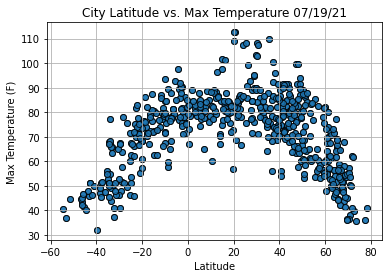

In [70]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature {time.strftime('%x')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


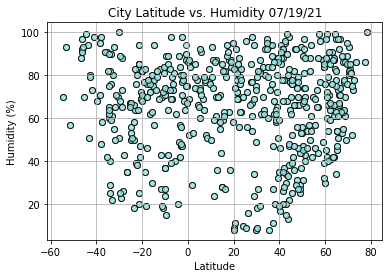

In [71]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities",color='#A0E7E5')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity {time.strftime('%x')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

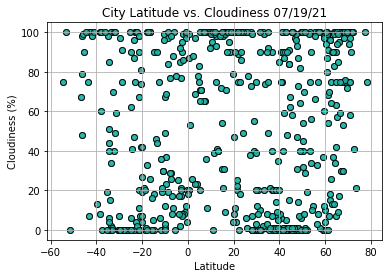

In [72]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities",color='#21B6A8')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness {time.strftime('%x')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

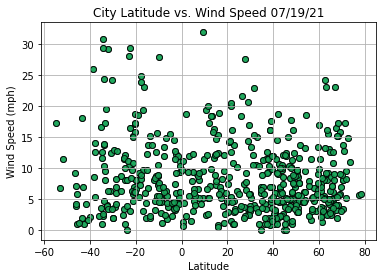

In [74]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities",color='#18A558')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed {time.strftime('%x')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [102]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f'The value of r is: {r_value}')

In [103]:
index13=city_data_df.loc[13]
index13

City                  Clyde River
Lat                       70.4692
Lng                      -68.5914
Max Temp                    36.52
Humidity                       80
Cloudiness                    100
Wind Speed                    8.1
Country                        CA
Date          2021-07-18 15:04:39
Name: 13, dtype: object

In [104]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


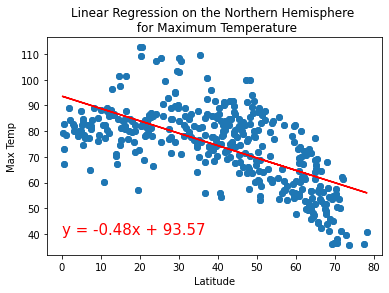

The value of r is: -0.6300927524179857


In [105]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       f'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(0,40))

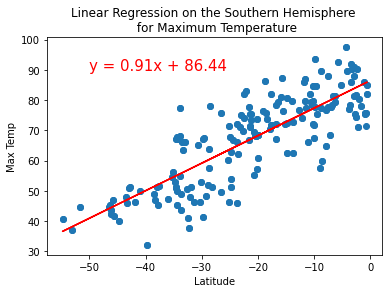

The value of r is: 0.8203977884767426


In [106]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       f'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

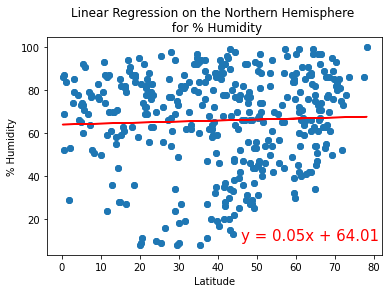

The value of r is: 0.041270960354518015


In [113]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(46,10))

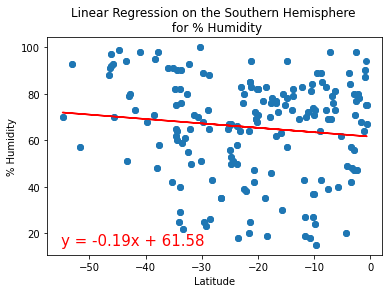

The value of r is: -0.11763901587260348


In [115]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-55,15))

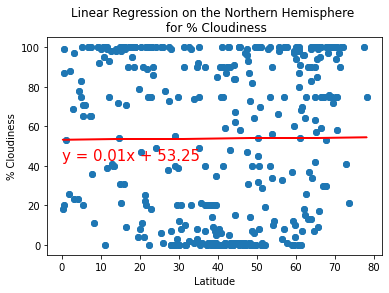

The value of r is: 0.007234269611603873


In [118]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(0,43))

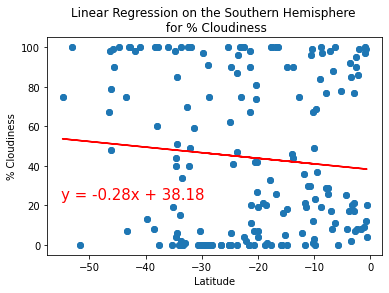

The value of r is: -0.09452199050403594


In [121]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55,23))

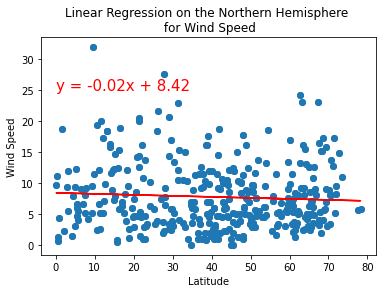

The value of r is: -0.06191971982665298


In [124]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(0,25))

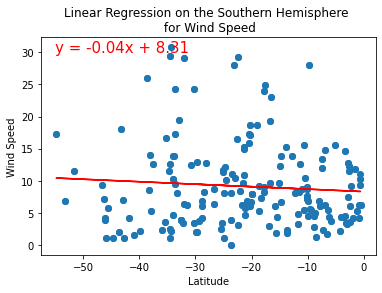

The value of r is: -0.07743451948960775


In [128]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-55,30))
